In [161]:
import torch
import numpy as np
from torch import nn
import random
import math
import matplotlib.pyplot as plt

In [166]:
import json
data = json.loads(open("dataset3.json").read())
X_train = np.array(data["X"]).astype(np.double)
Y_train = np.array(data["Y"]).astype(np.double)
len(data["X"])

224

In [163]:
class BG(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(3, 2)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(2, 2)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x
model = BG()

guess: tensor([0.0015, 0.9984], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([ 1.4677, -0.4680], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([-5.1714e-04,  1.0004e+00], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([ 1.3151, -0.3153], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([0.9060, 0.0938], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([ 1.2791, -0.2794], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([0.3822, 0.6177], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([-0.0017,  1.0017], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([0.1101, 0.8899], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([0.8360, 0.1639], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([0.5669, 0.4329], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([0.0130, 0.9870], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([0.6549,

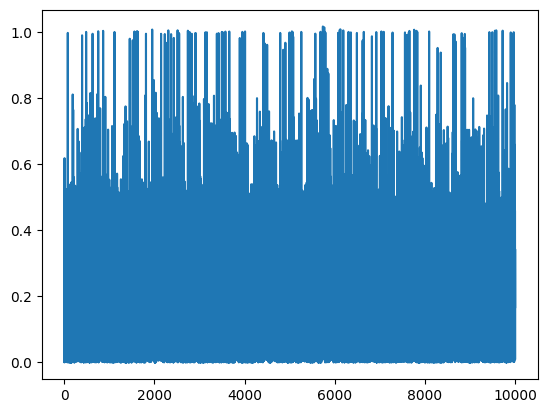

In [169]:
loss_function = nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)
loses = []
for i in range(10000):
    samp = math.floor(random.random()*len(X_train))
    input = torch.tensor(X_train[samp]).float()
    target = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    guess = model(input)
    print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(loss.item())
plt.plot(loses)

In [176]:
# load model
model = BG()
model.load_state_dict("models/color_1.pt")
model.eval()

TypeError: Expected state_dict to be dict-like, got <class 'str'>.

In [ ]:
# test
color = torch.tensor(np.array([27/255, 242/255, 84/255])).float()
model(color)

tensor([0.2457, 0.7542], grad_fn=<AddBackward0>)

In [ ]:
torch.save(model.state_dict(), "models/color_1.pt")